# Visualization with Matplotlib

In order to understand and effectively use Matplotlib to make visualizations of data, it's important to understand the parts of a Matplotlib figure object. The code in the cell below is [taken directly from the Matplotlib documentation](https://matplotlib.org/stable/gallery/showcase/anatomy.html), which uses Matplotlib code to create an annotated graph that demonstrates the many facets of a plot. And because the code is provided, it illustrates how to use them. Note that some of the objects and methods used in the code below are things that you might not use regularly (if ever). But many of the methods below will become very familiar to you throughout the rest of the semester and as you use Matplotlib in your research

### __Challenge:__ What is the code below doing?

Execute the Jupyter notebook code below and verify that it produces a plot with a variety of annotations. Then, with a partner, review the lines of the cell and add comments that denote what the line of code does. Also, in the last class when we made our first figure, we used the command `plt.xlabel('Axis label')` command as opposed to the use of the `ax.set_label('Axis label')` in the code below. Why do these two uses differ? 

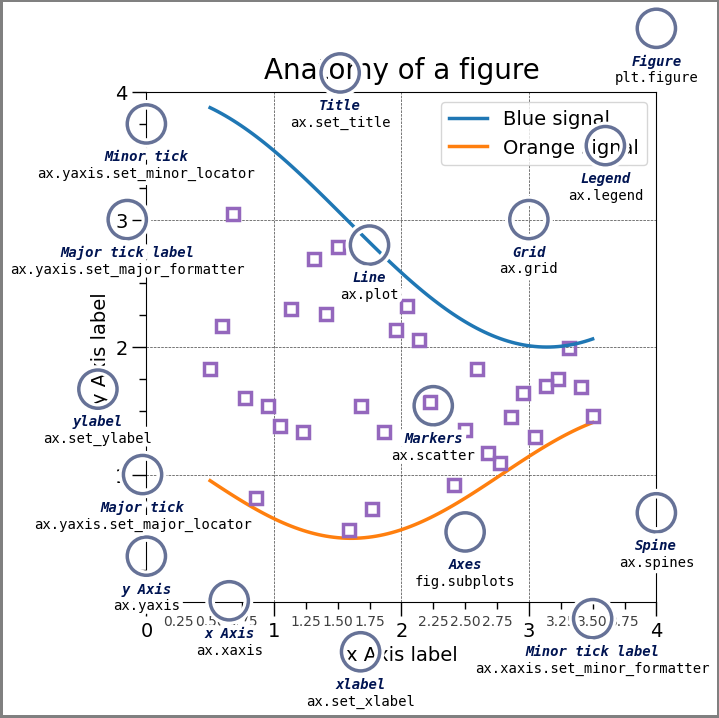

In [19]:
import matplotlib.pyplot as plt #importing matplotlib library
import numpy as np #importing numpy

from matplotlib.patches import Circle #importing circles from patches
from matplotlib.patheffects import withStroke #importing a formatting tool
from matplotlib.ticker import AutoMinorLocator, MultipleLocator #controlling tick locations

royal_blue = [0, 20/256, 82/256] #color code for royal blue


# make the figure

np.random.seed(19680801) #creates random number set with a specific seed (like a title for a specific set of random numbers)

X = np.linspace(0.5, 3.5, 100) #creates an array of 100 numbers from 0.5 to 3.5 (independent variable)
Y1 = 3+np.cos(X) #a function
Y2 = 1+np.cos(1+X/0.75)/2 #another function
Y3 = np.random.uniform(Y1, Y2, len(X)) #gives 100 random points between the 2 functions

fig = plt.figure(figsize=(7.5, 7.5)) #creates a base figure with a size of 7.5 by 7.5
ax = fig.add_axes([0.2, 0.17, 0.68, 0.7], aspect=1) #adds axises to the figure with specific dimentions

ax.xaxis.set_major_locator(MultipleLocator(1.000)) #sets size of tick marks for major ticks
ax.xaxis.set_minor_locator(AutoMinorLocator(4)) #sets size of tick marks between major ticks
ax.yaxis.set_major_locator(MultipleLocator(1.000)) #same but for y
ax.yaxis.set_minor_locator(AutoMinorLocator(4)) #same but for y
ax.xaxis.set_minor_formatter("{x:.2f}") #prints minor labels for the axis

ax.set_xlim(0, 4) #limits the x axis
ax.set_ylim(0, 4) #limits the y axis

ax.tick_params(which='major', width=1.0, length=10, labelsize=14) #formatting for the major ticks
ax.tick_params(which='minor', width=1.0, length=5, labelsize=10, #formatting for the minor ticks
               labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10) #creates a formatted grid with dashed lines

ax.plot(X, Y1, c='C0', lw=2.5, label="Blue signal", zorder=10) #plots first function with formatting and label
ax.plot(X, Y2, c='C1', lw=2.5, label="Orange signal") #plots the second function with formatting and label
ax.plot(X[::3], Y3[::3], linewidth=0, markersize=9,
        marker='s', markerfacecolor='none', markeredgecolor='C4',
        markeredgewidth=2.5) #another formatter specifying the range of the function

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom') #creates title
ax.set_xlabel("x Axis label", fontsize=14) #creates x axis label
ax.set_ylabel("y Axis label", fontsize=14) #creates y axis label
ax.legend(loc="upper right", fontsize=14) #creates legend and location and fontsize


# Annotate the figure

def annotate(x, y, text, code): #annotation tool that circles and labels specific codes
    # Circle marker
    c = Circle((x, y), radius=0.15, clip_on=False, zorder=10, linewidth=2.5,
               edgecolor=royal_blue + [0.6], facecolor='none',
               path_effects=[withStroke(linewidth=7, foreground='white')])
    ax.add_artist(c)

    # use path_effects as a background for the texts
    # draw the path_effects and the colored text separately so that the
    # path_effects cannot clip other texts
    for path_effects in [[withStroke(linewidth=7, foreground='white')], []]:
        color = 'white' if path_effects else royal_blue
        ax.text(x, y-0.2, text, zorder=100,
                ha='center', va='top', weight='bold', color=color,
                style='italic', fontfamily='monospace',
                path_effects=path_effects)

        color = 'white' if path_effects else 'black'
        ax.text(x, y-0.33, code, zorder=100,
                ha='center', va='top', weight='normal', color=color,
                fontfamily='monospace', fontsize='medium',
                path_effects=path_effects)


annotate(3.5, -0.13, "Minor tick label", "ax.xaxis.set_minor_formatter") #annotations of different pieces of codes
annotate(-0.03, 1.0, "Major tick", "ax.yaxis.set_major_locator")
annotate(0.00, 3.75, "Minor tick", "ax.yaxis.set_minor_locator")
annotate(-0.15, 3.00, "Major tick label", "ax.yaxis.set_major_formatter")
annotate(1.68, -0.39, "xlabel", "ax.set_xlabel")
annotate(-0.38, 1.67, "ylabel", "ax.set_ylabel")
annotate(1.52, 4.15, "Title", "ax.set_title")
annotate(1.75, 2.80, "Line", "ax.plot")
annotate(2.25, 1.54, "Markers", "ax.scatter")
annotate(3.00, 3.00, "Grid", "ax.grid")
annotate(3.60, 3.58, "Legend", "ax.legend")
annotate(2.5, 0.55, "Axes", "fig.subplots")
annotate(4, 4.5, "Figure", "plt.figure")
annotate(0.65, 0.01, "x Axis", "ax.xaxis")
annotate(0, 0.36, "y Axis", "ax.yaxis")
annotate(4.0, 0.7, "Spine", "ax.spines")

# frame around figure
fig.patch.set(linewidth=4, edgecolor='0.5') #creates outline around the figure
plt.show() #shows the overall plot

## __Challenge:__ Beautify an Intentionally Ugly Graph

The code in the cell below reads in daily average streamflow data for Water Year 2017 (i.e., from 2016-10-01 to 2017-09-30) for one of four gages in the Upper Boise River Basin. It uses the `pandas` library to do so. We'll learn a lot more about `pandas` later, but for now this provides us with the ability to deal with dates and times in a structured way that doesn't require us to format text. 

The cell that follows then creates a very rudimentary (i.e., bad) plot of the streamflow for the water year. Your task as a table, is to use what you learned about Matplotlib figures in the exercise above, and the [Matplotlib documentation](https://matplotlib.org/stable/users/index) (if needed) to create something approaching a "presentation ready" figure for streamflow at your gage. Some minimum characteristics of such a figure include:

- Use of SI units
- Labelled axes
- Clear labeling of what is being plotted (search the web if you need to)
- Legible font sizes

When you're done, create __one__ figure that represents the code of your table and paste the output figure it in [this shared slide deck](https://docs.google.com/presentation/d/1bUpZ3Ms1-QGXGN1pgU7CGhgaOo3ZtHv3ZnWLGHfxvj4/edit?usp=sharing). 


In [31]:
import pandas as pd # Needed to read data in

table = 3 # Your table

gages = ['13200000', # Mores Creek Above Robie Creek
         '13185000', # Boise River Near Twin Springs
         '13186000', # SF Boise River near Featherville 
         '13192200'  # SF Boise Near Arrowrock Dam
         ]

filename = 'Unit02-data/usgs_streamflow_'+gages[table]+'_dv.csv'

# Use Pandas to read the data into a "DataFrame." More on this later, but think of 
# df below as an object that stores a spreadsheet with columns that have names
df = pd.read_csv(filename)
display(df)


,date,q_cfs
0,2016-10-01,376.0
1,2016-10-02,372.0
2,2016-10-03,366.0
3,2016-10-04,374.0
4,2016-10-05,370.0
...,...,...
360,2017-09-26,398.0
361,2017-09-27,392.0
362,2017-09-28,383.0
363,2017-09-29,382.0


In [65]:
def SI_ft3_m3(data):
    m_cubed = data['q_cfs']/35.3147
    return m_cubed

SI_ft3_m3(df)

0      10.647124
1      10.533857
2      10.363956
3      10.590491
4      10.477223
         ...    
360    11.270094
361    11.100193
362    10.845342
363    10.817025
364    10.788708
Name: q_cfs, Length: 365, dtype: float64

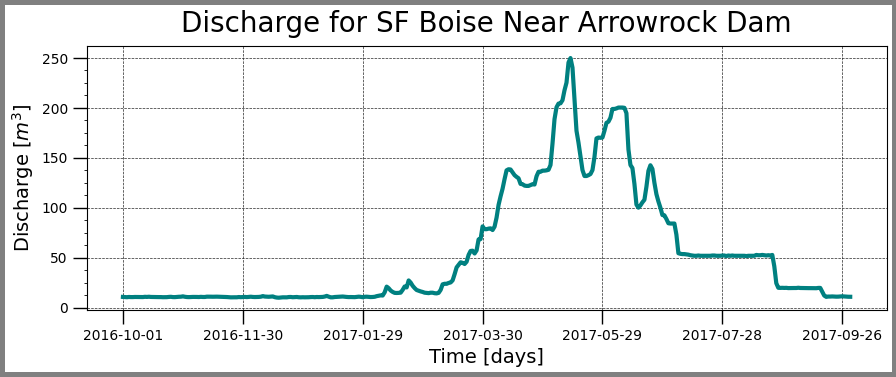

In [125]:
fig1 = plt.figure(figsize=(10,10))
ax1 = fig1.add_axes([0.1, 0.1, 0.8, 0.8], aspect=0.5)
ax1.xaxis.set_major_locator(MultipleLocator(60)) 

ax1.yaxis.set_major_locator(MultipleLocator(50)) 
ax1.yaxis.set_minor_locator(AutoMinorLocator(4)) 

ax1.tick_params(which='major', width=1.0, length=10, labelsize=10) 

ax1.set_title("Discharge for SF Boise Near Arrowrock Dam", fontsize=20, verticalalignment='bottom')
ax1.set_xlabel("Time [days]", fontsize=14) 
ax1.set_ylabel("Discharge [$m{^3}$]", fontsize=14) 
ax1.grid(linestyle="--", linewidth=0.5, color='.15', zorder=-10)
plt.plot(df.date, SI_ft3_m3(df), color='teal', linewidth=3)
fig1.patch.set(linewidth=6, edgecolor='0.5')
plt.show()